# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [158]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [159]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import Statements

In [160]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [161]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [162]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [163]:
df_data.shape

(4324, 9)

In [164]:
print("value of count: " , df_data.shape[0])
print("value of row: ", df_data.shape[1])

value of count:  4324
value of row:  9


In [165]:
df_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [166]:
df_data.isna().values.any()

True

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [167]:
df_data = df_data.dropna()

In [168]:
df_data.duplicated().any()

False

## Descriptive Statistics

In [169]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      964 non-null    int64 
 1   Unnamed: 0.1    964 non-null    int64 
 2   Organisation    964 non-null    object
 3   Location        964 non-null    object
 4   Date            964 non-null    object
 5   Detail          964 non-null    object
 6   Rocket_Status   964 non-null    object
 7   Price           964 non-null    object
 8   Mission_Status  964 non-null    object
dtypes: int64(2), object(7)
memory usage: 75.3+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [170]:
org_values = df_data.Organisation.value_counts()

In [171]:
org_values = org_values.iloc[15::-1]

In [172]:
colorful_bar = px.bar(x=org_values.values, y=org_values.index, color=org_values.values, color_continuous_scale="balance")
colorful_bar.update_layout(xaxis_title="Values", yaxis_title="Companies", title="Number of space mission launches by organisation", coloraxis_showscale=False)
colorful_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [173]:
aktive_rockets = df_data.Rocket_Status.value_counts().StatusActive
passive_rocket = df_data.Rocket_Status.value_counts().StatusRetired

In [174]:
print("Aktive Rockets: ", aktive_rockets)
print("Passive Rockets: ", passive_rocket)

Aktive Rockets:  586
Passive Rockets:  378


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [175]:
success_missions = df_data.Mission_Status.value_counts().Success
failure_missions = df_data.Mission_Status.value_counts().Failure

In [176]:
print("Number of success missions: ", success_missions)
print("Number of failure missions: ", failure_missions)

Number of success missions:  910
Number of failure missions:  36


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [177]:
all_countries = []
for i in df_data.Location:
  xx = i.split(",")[-1].lstrip()
  if xx == "Russia":
    all_countries.append("RUS")
  elif xx == "China" or xx == "Yellow Sea":
    all_countries.append("CHN")
  elif xx == "India":
    all_countries.append("IND")
  elif xx == "France":
    all_countries.append("FRA")
  elif xx == "Japan":
    all_countries.append("JPN")
  elif xx == "Kazakhstan":
    all_countries.append("KAZ")
  elif xx == "Pacific Missile Range Facility" or xx == "Gran Canaria":
    all_countries.append("USA")
  elif xx == "New Zealand":
    all_countries.append("NZL")
  else:
    all_countries.append("USA")

df_data["CountryCodes"] = all_countries
df_data[["Location", "CountryCodes"]]

,Location,CountryCodes
0,"LC-39A, Kennedy Space Center, Florida, USA",USA
1,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",CHN
3,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",KAZ
4,"SLC-41, Cape Canaveral AFS, Florida, USA",USA
5,"LC-9, Taiyuan Satellite Launch Center, China",CHN
...,...,...
3855,"SLC-4W, Vandenberg AFB, California, USA",USA
3971,"SLC-20, Cape Canaveral AFS, Florida, USA",USA
3993,"SLC-20, Cape Canaveral AFS, Florida, USA",USA
4000,"SLC-20, Cape Canaveral AFS, Florida, USA",USA


In [178]:
numberOfLaunches = df_data.CountryCodes.value_counts()
numberOfLaunches

USA    490
CHN    159
FRA     95
IND     67
RUS     54
KAZ     46
JPN     40
NZL     13
Name: CountryCodes, dtype: int64

In [179]:
df = px.choropleth(locations=numberOfLaunches.index, color=numberOfLaunches.values,
                   labels={"color": "Color of counts"}, title="Number Of Total Launches")
df.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [180]:
numberOfFailure = df_data[df_data["Mission_Status"] == "Failure"].CountryCodes.value_counts()
numberOfFailure

USA    20
IND     5
CHN     4
NZL     2
FRA     2
KAZ     2
RUS     1
Name: CountryCodes, dtype: int64

In [181]:
df = px.choropleth(locations=numberOfFailure.index, color=numberOfFailure.values, title="Number of Fail Launches", labels={"color":"Color of counts"})
df.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [182]:
sunburst_data = df_data.groupby(by=["CountryCodes","Organisation","Mission_Status"], as_index=False).agg({"Mission_Status":pd.Series.count})
sunburst_data

,CountryCodes,Organisation,Mission_Status
0,CHN,CASC,3
1,CHN,CASC,3
2,CHN,CASC,152
3,CHN,ExPace,1
4,FRA,Arianespace,2
5,FRA,Arianespace,1
6,FRA,Arianespace,91
7,FRA,ESA,1
8,IND,ISRO,5
9,IND,ISRO,3


In [183]:
fig = px.sunburst(sunburst_data, path=["CountryCodes","Organisation","Mission_Status"], values="Mission_Status",labels=["Success","Failure","Prelaunch Failure", "Partial Failure"])
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [184]:
new_df = pd.DataFrame(df_data, columns=["Organisation","Price"])
new_df["Price"] = new_df["Price"].replace(",", "", regex=True)
new_df["Price"] = new_df["Price"].astype(float)
new_df.sort_values(by="Price", ascending=True)

,Organisation,Price
102,CASC,5.30
281,CASC,5.30
26,CASC,5.30
176,CASC,5.30
487,CASC,5.30
...,...,...
3584,NASA,"1,160.00"
3511,NASA,"1,160.00"
3545,NASA,"1,160.00"
2000,RVSN USSR,"5,000.00"


In [185]:
totalPrices = new_df.groupby(["Organisation"]).agg({"Price":pd.Series.sum})
totalPrices

,Price
Organisation,
Arianespace,"16,345.00"
Boeing,"1,241.00"
CASC,"6,340.26"
EER,20.00
ESA,37.00
Eurockot,543.40
ExPace,28.30
ILS,"1,320.00"
ISRO,"2,177.00"


# Analyse the Amount of Money Spent by Organisation per Launch

In [186]:
numberOfLaunch = df_data.groupby(["Organisation"]).agg({"Mission_Status":pd.Series.count})


In [187]:
totalPrices["Missions"] = numberOfLaunch.Mission_Status


In [188]:
totalPrices["MoneyPerLaunch"] = totalPrices.Price / totalPrices.Missions

In [189]:
totalPrices

,Price,Missions,MoneyPerLaunch
Organisation,,,
Arianespace,"16,345.00",96,170.26
Boeing,"1,241.00",7,177.29
CASC,"6,340.26",158,40.13
EER,20.00,1,20.00
ESA,37.00,1,37.00
Eurockot,543.40,13,41.80
ExPace,28.30,1,28.30
ILS,"1,320.00",13,101.54
ISRO,"2,177.00",67,32.49


# Chart the Number of Launches per Year

In [190]:
years = []
for i in df_data.Date:
  years.append(i.split(",")[1].split(" ")[1])

df_data["Year"] = years


In [191]:
df_data.groupby(["Year"]).agg({"Mission_Status":pd.Series.value_counts})

,Mission_Status
Year,
1964,"[1, 1]"
1965,2
1966,3
1967,"[6, 1, 1]"
1968,"[9, 1]"
1969,8
1970,1
1971,2
1972,2


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [202]:
months = []

for i in df_data.Date:
  xx_i = i.split(" ")
  xx_y = xx_i[1] +","+ xx_i[3]
  months.append(xx_y)

df_data["Months"] = months

In [205]:
xx = pd.DataFrame(data=df_data.Months)
xx.Months.value_counts()

Jul,2020    12
Jun,2017    12
Jan,2018    11
Dec,2018    11
Nov,2018    10
            ..
Sep,1996     1
Aug,1996     1
Jul,1996     1
Jun,1996     1
Sep,1964     1
Name: Months, Length: 388, dtype: int64

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [209]:
xx.value_counts().head()

Months  
Jul,2020    12
Jun,2017    12
Jan,2018    11
Dec,2018    11
Nov,2018    10
dtype: int64

In [210]:
print("It is clearly seen that, summer (July-June) and winter(December-January) are best seasons for launch a rocket")

It is clearly seen that, summer (July-June) and winter(December-January) are best seasons for launch a rocket


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [218]:
df_data["Price"] = df_data["Price"].replace(",","", regex=True)
df_data["Price"] = df_data["Price"].astype(float)

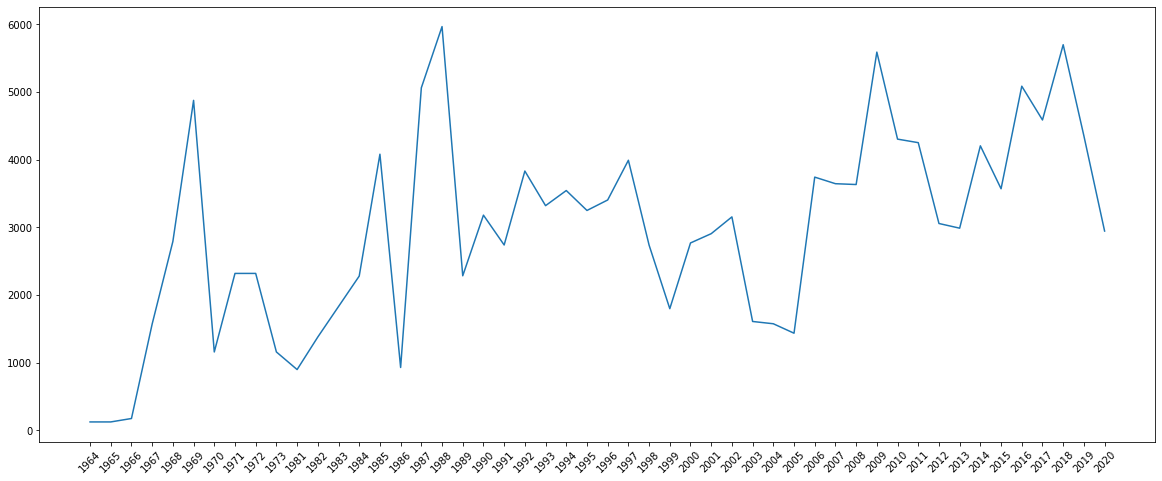

In [227]:
x = df_data.groupby(["Year"]).agg({"Price":pd.Series.sum}).index
y = df_data.groupby(["Year"]).agg({"Price":pd.Series.sum}).values

plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
fig = plt.plot(x,y)

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [239]:
df_data.groupby(["Year","Organisation"]).agg({"Organisation":pd.Series.value_counts})

Organisation
Year Organisation              
1964 US Air Force             2
1965 US Air Force             2
1966 US Air Force             3
1967 NASA                     1
     US Air Force             7
...                         ...
2020 Roscosmos                4
     SpaceX                  13
     ULA                      4
     VKS RF                   1
     Virgin Orbit             1

[268 rows x 1 columns]

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [248]:
df_data["Year"] = df_data["Year"].astype(int)


In [299]:
USAinColdWar = df_data.loc[(df_data.CountryCodes == "USA") & ((df_data.Year>=1964) & (df_data.Year<=1991))].Rocket_Status.count()
russiaInColdWar = df_data.loc[(df_data.CountryCodes == "RUS") & ((df_data.Year>=1964) & (df_data.Year<=1991))].Rocket_Status.count()
print(f"USA launched {USAinColdWar} rockets to space in cold war, whilst Russia launched just {russiaInColdWar}")

USA launched 90 rockets to space in cold war, whilst Russia launched just 0


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [286]:
total_USA = df_data.loc[(df_data.CountryCodes == "USA")].Rocket_Status.count()
total_russia = df_data.loc[(df_data.CountryCodes == "RUS") | (df_data.CountryCodes == "KAZ") ].Rocket_Status.count()
total_russia
total_russia

100

In [288]:
fig = px.pie(names=["USSR","USA"], values=[total_russia,total_USA])
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [289]:
df_data.loc[(df_data.CountryCodes == "RUS") | (df_data.CountryCodes == "KAZ") | (df_data.CountryCodes == "USA") ].groupby(["Year","CountryCodes"]).agg({"CountryCodes":pd.Series.value_counts})

CountryCodes
Year CountryCodes              
1964 USA                      2
1965 USA                      2
1966 USA                      3
1967 USA                      8
1968 USA                     10
...                         ...
2019 RUS                      5
     USA                     19
2020 KAZ                      6
     RUS                      1
     USA                     20

[87 rows x 1 columns]

## Chart the Total Number of Mission Failures Year on Year.

In [291]:
df_data.loc[(df_data.Mission_Status == "Failure") & ((df_data.CountryCodes == "RUS") | (df_data.CountryCodes == "KAZ") | (df_data.CountryCodes == "USA"))].groupby(["Year","CountryCodes"]).agg({"CountryCodes":pd.Series.value_counts})

,,CountryCodes
Year,CountryCodes,
1964,USA,1
1967,USA,1
1986,USA,1
1990,USA,1
1993,USA,1
1994,USA,1
1995,USA,2
1996,USA,1
2001,USA,1


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [297]:
df_data.loc[(df_data.Year >= 1970) & (df_data.Year <1990)].groupby(["Organisation"]).agg({"Organisation":pd.Series.value_counts})

,Organisation
Organisation,
CASC,8
Martin Marietta,2
NASA,38
RVSN USSR,2


In [298]:
df_data.loc[(df_data.Year >= 2018) & (df_data.Year <=2020)].groupby(["Organisation"]).agg({"Organisation":pd.Series.value_counts})

,Organisation
Organisation,
Arianespace,17
CASC,64
Eurockot,1
ExPace,1
ILS,1
ISRO,12
JAXA,3
MHI,7
Northrop,7
